# <center>Term Project</center><br><center>Credit Card Fraud Detection</center>

<center><b>Predictive Analytics</b><br>By<br></center>



<center><b>Shani Kumar<br> Yalamanchilli ChandraMoulli</b></center>


### Introduction:

<b>Project Assignment: Credit Card Fraud Detection</b>
Increasing fraud in the industry makes fraud prediction very critical to be able to identify and stop fraud in real time, and data science plays a significant role in analyzing and being able to predict fraud based on transactional and cardholder information. The scope of this project is to research and identify different types of predictive analysis algorithms available that can be applied to determine and stop fraudulent transactions.

<b>Data source</b> We are using dataset from Kaggle.com - creditcard.csv file.

<b>Backgroud of Dataset</b> This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, owner of the dataset did not provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.



### Source Data

https://www.kaggle.com/mlg-ulb/creditcardfraud

**creditcard.csv** - Transaction Data


In [2]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# configure display of graph
%matplotlib inline

#stop unnecessary warnings from printing to the screen
warnings.simplefilter('ignore')

### Load data into a dataframe

In [3]:
# load the csv file as a data frame
trn = pd.read_csv('data/creditcard.csv')
# summarize the shape of the dataset
print(trn.shape)
# summarize the class distribution
target = trn.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(284807, 31)
Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


### Observations based on exploratory analysis done in R and Python
1. Transaction distribution follows normal distribution which we usually expect. Mostly transaction happens during the day time. Mostly in the morning time after most stores opens and after mostly after noon time. As the day end transaction count start reducing.
1. Most of the transactions are low amount transactions (less then 50$) so we can expect most fraud in this range because high amount transactions people do notice easily.
1. Fraudulent transactions are very less in count but thats where we want to exploit and identify fraud transaction characterstics so that we can avoid them by recognizing them before approving.
1. The class distribution is confirming the severe skew in distribution, with about 99.827 percent of transactions marked as normal and about 0.173 percent marked as fraudulent. 

## Modeling

In [5]:
# split inpit and output features
data = trn.values
data_X, data_Y = data[:, :-1], data[:, -1]

## Modeling after oversampling the data using SMOTE method

In [6]:
from imblearn.over_sampling import SMOTE

# Define resampling method and split into train and test
method = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, train_size=0.6, random_state=0)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [7]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
    # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
    # calculate area under curve
    return auc(r, p)
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(pr_auc, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # DTREE
    models.append(DecisionTreeClassifier())
    names.append('DTREE')
    # KNN
    steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=100))
    names.append('ET')
    # Bagging
    models.append(BaggingClassifier(n_estimators=100))
    names.append('BAG')
    return models, names

In [45]:
# define models
models, names = get_models()
results = list()

i=0

# evaluate the model and store results
scores = evaluate_model(X_resampled, y_resampled, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>DTREE 0.999 (0.000)


In [47]:
i=1

# evaluate the model and store results
scores = evaluate_model(X_resampled, y_resampled, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>KNN 1.000 (0.000)


In [48]:
i=2

# evaluate the model and store results
scores = evaluate_model(X_resampled, y_resampled, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>RF 1.000 (0.000)


In [49]:
i=3

# evaluate the model and store results
scores = evaluate_model(X_resampled, y_resampled, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>ET 1.000 (0.000)


In [50]:
i=4

# evaluate the model and store results
scores = evaluate_model(X_resampled, y_resampled, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>BAG 1.000 (0.000)


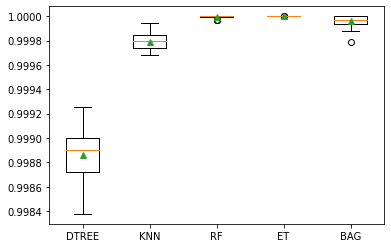

In [52]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Perform Prediction and evaluate result

In [69]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_resampled, y_resampled)

# Obtain the predictions from our random forest model 
predicted = model_DT.predict(X_test)

# Predict probabilities
probs = model_DT.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.8911200466120125

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113724
         1.0       0.45      0.78      0.57       199

    accuracy                           1.00    113923
   macro avg       0.72      0.89      0.79    113923
weighted avg       1.00      1.00      1.00    113923


Confusion Matrix:
[[113533    191]
 [    43    156]]


In [70]:
# define model to evaluate
model = KNeighborsClassifier()
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])

pipeline.fit(X_resampled, y_resampled)

# Obtain the predictions from our random forest model 
predicted = pipeline.predict(X_test)

# Predict probabilities
probs = pipeline.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9041518397092563

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113724
         1.0       0.55      0.80      0.65       199

    accuracy                           1.00    113923
   macro avg       0.78      0.90      0.83    113923
weighted avg       1.00      1.00      1.00    113923


Confusion Matrix:
[[113595    129]
 [    40    159]]


In [72]:
model_BC = BaggingClassifier(n_estimators=100)
model_BC.fit(X_resampled, y_resampled)

# Obtain the predictions from our random forest model 
predicted = model_BC.predict(X_test)

# Predict probabilities
probs = model_BC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.94364532203418

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113724
         1.0       0.75      0.81      0.78       199

    accuracy                           1.00    113923
   macro avg       0.87      0.90      0.89    113923
weighted avg       1.00      1.00      1.00    113923


Confusion Matrix:
[[113669     55]
 [    38    161]]


In [73]:
model_RFC = RandomForestClassifier(n_estimators=100)
model_RFC.fit(X_resampled, y_resampled)

# Obtain the predictions from our random forest model 
predicted = model_RFC.predict(X_test)

# Predict probabilities
probs = model_RFC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9582566909324153

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113724
         1.0       0.88      0.82      0.85       199

    accuracy                           1.00    113923
   macro avg       0.94      0.91      0.92    113923
weighted avg       1.00      1.00      1.00    113923


Confusion Matrix:
[[113701     23]
 [    35    164]]


In [74]:
model_EC = ExtraTreesClassifier(n_estimators=100)
model_EC.fit(X_resampled, y_resampled)

# Obtain the predictions from our random forest model 
predicted = model_EC.predict(X_test)

# Predict probabilities
probs = model_EC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9637868080156683

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113724
         1.0       0.90      0.82      0.86       199

    accuracy                           1.00    113923
   macro avg       0.95      0.91      0.93    113923
weighted avg       1.00      1.00      1.00    113923


Confusion Matrix:
[[113706     18]
 [    35    164]]


## Modeling without oversampling

In [10]:
from imblearn.over_sampling import SMOTE

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, train_size=0.8, random_state=0)

In [80]:
i=0

# evaluate the model and store results
scores = evaluate_model(X_train, y_train, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>DTREE 0.754 (0.045)


In [81]:
i=1

# evaluate the model and store results
scores = evaluate_model(X_train, y_train, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>KNN 0.865 (0.047)


In [82]:
i=2

# evaluate the model and store results
scores = evaluate_model(X_train, y_train, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>RF 0.853 (0.048)


In [83]:
i=3

# evaluate the model and store results
scores = evaluate_model(X_train, y_train, models[i])
results.append(scores)

# summarize performance
print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>ET 0.860 (0.051)


In [12]:
i=4

# evaluate the model and store results
#scores = evaluate_model(X_train, y_train, models[i])
#results.append(scores)

# summarize performance
#print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
print("Skiped this one because it was taking a lot of time to complete")

Skiped this one because it was taking a lot of time to complete


### Perform Prediction and evaluate result

In [87]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Obtain the predictions from our random forest model 
predicted = model_DT.predict(X_test)

# Predict probabilities
probs = model_DT.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9057471398465008

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.79      0.81      0.80       101

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56839    22]
 [   19    82]]


In [88]:
# define model to evaluate
model = KNeighborsClassifier()
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])

pipeline.fit(X_train, y_train)

# Obtain the predictions from our random forest model 
predicted = pipeline.predict(X_test)

# Predict probabilities
probs = pipeline.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9256089323956753

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.90      0.80      0.85       101

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56852     9]
 [   20    81]]


In [13]:
#model_BC = BaggingClassifier(n_estimators=100)
#model_BC.fit(X_train, y_train)

# Obtain the predictions from our random forest model 
#predicted = model_BC.predict(X_test)

# Predict probabilities
#probs = model_BC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
#print('ROC Score:')
#print(roc_auc_score(y_test, probs[:,1]))
#print('\nClassification Report:')
#print(classification_report(y_test, predicted))
#print('\nConfusion Matrix:')
#print(confusion_matrix(y_test, predicted))
print("Skiped this one because it was taking a lot of time to complete")

Skiped this one because it was taking a lot of time to complete


In [89]:
model_RFC = RandomForestClassifier(n_estimators=100)
model_RFC.fit(X_train, y_train)

# Obtain the predictions from our random forest model 
predicted = model_RFC.predict(X_test)

# Predict probabilities
probs = model_RFC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9442533215879403

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.94      0.77      0.85       101

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56856     5]
 [   23    78]]


In [90]:
model_EC = ExtraTreesClassifier(n_estimators=100)
model_EC.fit(X_train, y_train)

# Obtain the predictions from our random forest model 
predicted = model_EC.predict(X_test)

# Predict probabilities
probs = model_EC.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9637172357604378

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.94      0.79      0.86       101

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56856     5]
 [   21    80]]


In [40]:
%%html
<style>
table {float:left}
</style>

## Result Summary

### Results from Training Data

 | Model         | Description | Avg PR-AUC (With Sampling)   | Avg PR-AUC (Without Sampling) 
| :---           |    :----   |          ---: |          ---: |
| Decision Tree Classifier            | Very intuitive and easy to explain but small change in the data can cause a large change in the structure of the decision tree causing instability  | 0.999   | 0.754 |
| K Neighbors Classifier    | Easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.        | 1.000      | 0.865 |
| Bagging Classifier  | Help reduce variance from models that are might be very accurate, but only on the data they were trained on. Takes a lot of time   | 1.000      | |
| Random Forest Classifier | Simple and relatively fast Model. It offers a lot of scope in improving the model’s precision by tuning the hyperparameters and choosing the crucial features.       | 1.000      | 0.853
| Extra Tree Classifier | One of the best performing model. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:        | 1.000      | 0.860 |


### Results from Test Data

 #### From Model with Oversample training data
 
 | Model         | ROC Score | True Negetive   | False Positive | False Negative | True Positive
| :---           |    ----:  |          ---: |          ---: |         ---: |         ---: |
| Decision Tree Classifier  |  0.891| 113533   | 191 | 43|156
| K Neighbors Classifier    |  0.904| 113595   | 129 | 40|159
| Bagging Classifier        |  0.943| 113669   | 55  | 38|161
| Random Forest Classifier  |  0.958| 113701   | 23  | 35|164
| Extra Tree Classifier     |  0.963| 113706   | 18  | 35|164

 #### From Model without Oversample training data
 
 | Model         | ROC Score | True Negetive   | False Positive | False Negative | True Positive
| :---           |    ----:  |          ---: |          ---: |         ---: |         ---: |
| Decision Tree Classifier  |  0.905|    56839|  22| 19| 82
| K Neighbors Classifier    |  0.925|    56852|  9| 20| 81
| Bagging Classifier        |  |    |  | |
| Random Forest Classifier  |  0.944|    56856|  5| 23| 78
| Extra Tree Classifier     |  0.963|    56856|  5| 21| 80

##  Model Summary

Here are the basis of the selection and feedback based on execution result.

**1. Decision Tree Classifier** Decision Tree solves the problem of machine learning by transforming the data into tree representation. requires less effort for data preparation during pre-processing and does not require normalization of data. Missing values in the data also does not affect the process of building decision tree to any considerable extent. It was one of the fast performing model and accuracy was good still it was worst performing model among other based on accuracy.

**2. K-Nearest Neighbor classifier**
KNN was a good simple model to try because it ‘trains’ very quickly by offsetting most of the computation to the actual testing portion. It is Flexible to feature/distance choices and naturally handles multi-class cases. Additionally it is relatively intuitive how the model works.  It was one of the good performing model.

**3. Random Forest classifier**
Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy and handles the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won’t allow overfitting trees in the model and has the power to handle a large data set with higher dimensionality.
It was one of the good performing model and also it performed fast as compared to KNN.

**4. Bagging Classifier** Bagging takes the advantage of ensemble learning wherein multiple weak learner outperform a single strong learner. It helps reduce variance and thus helps us avoid overfitting. It was taking a lot of time to train the model so I could not execute and get evaluation matric for model without oversampling. 

**5. Extra Tree Classifier** ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting. This method has yielded state-of-the-art results in several high-dimensional complex problems. It was best performing model.

Extra Tree Classifier works best and also works good with new data. KNN, Random-Forest & Bagging are other models that performed well.